In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [117]:
data = pd.read_csv("data.txt", header=None, names=["x1", "x2", "y"])
data.head()

,x1,x2,y
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [118]:
def plot_data(data, label_x, label_y, label_pos, label_neg, axes=None):
    # Get indexes for class 0 and class 1
    neg = data['y'] == 0
    pos = data['y'] == 1

    # If no specific axes object has been passed, get the current axes.
    if axes is None:
        axes = plt.gca()
    axes.scatter(data[pos]['x1'], data[pos]['x2'], marker='+', c='orange', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg]['x1'], data[neg]['x2'], c='blue', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon=True, fancybox=True);

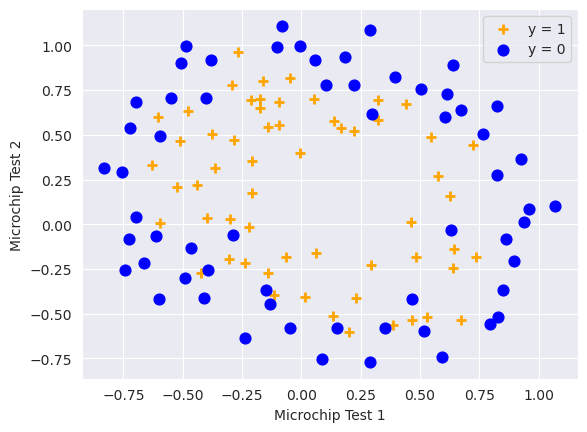

In [119]:
plot_data(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')

In [120]:
n = data.shape[1] - 1
x = data[data.columns[0:n]]
y = data[data.columns[n:n + 1]]

# convert to np.array
X = x.values
y = y.values

In [121]:
def map_feature(x1col, x2col):
    degrees = 10
    out = np.ones((x1col.shape[0], 1))

    for i in range(1, degrees + 1):
        for j in range(0, i + 1):
            term1 = x1col ** (i - j)
            term2 = x2col ** j
            term = (term1 * term2).reshape(term1.shape[0], 1)
            out = np.hstack((out, term))
    return out

In [122]:
XX = map_feature(X[:, 0], X[:, 1])
print(X.shape, XX.shape)

(118, 2) (118, 66)


In [123]:
from scipy.special import expit  #Vectorized sigmoid function


#Hypothesis function and cost function for logistic regression
def h(theta, myX):  #Logistic hypothesis function
    return expit(np.dot(myX, theta))

In [124]:
#Cost function, default lambda (regularization) 0
def compute_cost(theta, myX, myy, lamda=0.):
    m = len(myy)  # number of training examples

    term1 = np.dot(-np.array(myy).T, np.log(h(theta, myX)))
    term2 = np.dot((1 - np.array(myy)).T, np.log(1 - h(theta, myX)))
    reg_term = (lamda / 2) * np.sum(np.dot(theta[1:].T, theta[1:]))  #Skip theta0
    return float((1. / m) * (np.sum(term1 - term2) + reg_term))

In [125]:
def sigmoid_function(x):
    # different sigmoid function for negative and positive values
    return np.exp(x) / (1 + np.exp(x)) if x < 0 else 1 / (1 + np.exp(-x))

In [126]:
def compute_gradient(x, y, w):
    m, n = x.shape
    cost = np.zeros((n,))

    for i in range(m):
        sigmoid_value = sigmoid_function(np.dot(x[i], w))
        error = sigmoid_value - y[i]
        for j in range(n):
            cost[j] = cost[j] + error * x[i, j]
    cost = cost / m

    return cost

In [127]:
import math
import copy

initial_theta = np.zeros(XX.shape[1])


def optimize_regularized_theta(theta, myX, myy, alpha, num_iters, my_lambda=0.):
    m = myX.shape[0]
    j_history = []
    thetas = copy.deepcopy(theta)

    for i in range(num_iters):
        dj_dw = compute_gradient(myX, myy, thetas)
        thetas = thetas * (1 - alpha * (my_lambda / m)) - alpha * dj_dw
        j_history.append(compute_cost(thetas, myX, myy, my_lambda))
    return j_history, thetas, min(j_history)


j_history, theta, min_cost = optimize_regularized_theta(initial_theta, XX, y, 0.1, 100)

## Plotting of Cost function


Text(0.5, 1.0, 'Cost function using Gradient Descent')

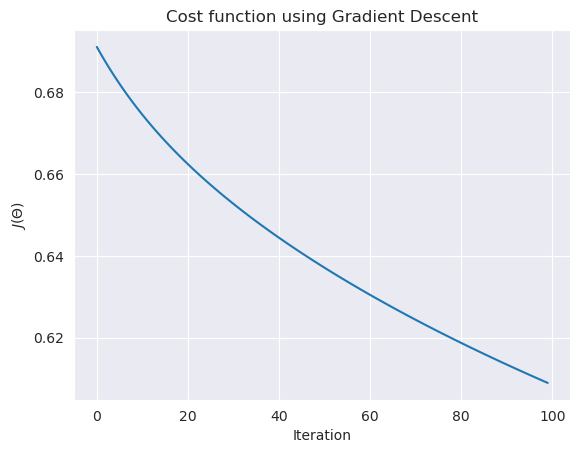

In [128]:
plt.plot(j_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

In [129]:
def plot_boundary(theta, myX, myy, my_lambda=0.):
    """
    Function to plot the decision boundary for arbitrary theta, X, y, lambda value
    Inside this function is feature mapping, and the minimization routine.
    It works by making a grid of x1 ("x_vals") and x2 ("y_vals") points,
    And for each, computing whether the hypothesis classifies that point as
    True or False. Then, a contour is drawn with a built-in pyplot function.
    """
    alpha = .1
    iters = 1000
    j_history, theta, min_cost = optimize_regularized_theta(theta, myX, myy, alpha, iters, my_lambda)
    x_vals = np.linspace(-1, 1.5, 50)
    y_vals = np.linspace(-1, 1.5, 50)
    z_vals = np.zeros((len(x_vals), len(y_vals)))
    for i in range(len(x_vals)):
        for j in range(len(y_vals)):
            my_features_ij = map_feature(np.array([x_vals[i]]), np.array([y_vals[j]]))
            z_vals[i][j] = np.dot(theta, my_features_ij.T)
            # print(type(z_vals), z_vals.shape)
    z_vals = z_vals.transpose()

    u, v = np.meshgrid(x_vals, y_vals)
    my_contour = plt.contour(x_vals, y_vals, z_vals, [0])
    #Kind of a hacky way to display a text on top of the decision boundary
    fmt = {0: 'Lambda = %d' % my_lambda}
    plt.clabel(my_contour, inline=1, fontsize=15, fmt=fmt)
    plt.title("Decision Boundary")

[ 1.26417001e+00  7.35785885e-01  1.34575328e+00 -2.05425981e+00
 -9.41669252e-01 -1.20175477e+00  2.36484563e-01 -4.14345656e-01
 -4.16023101e-01 -1.18983482e-02 -1.50604511e+00 -8.73088139e-02
 -6.65501535e-01 -2.97257007e-01 -1.06321371e+00 -1.61310274e-01
 -2.42833027e-01 -7.79800864e-02 -2.93290541e-01 -3.33313239e-01
 -3.29543875e-01 -1.06496165e+00  5.95148218e-03 -3.24248588e-01
 -5.39771789e-03 -3.48586876e-01 -1.63715987e-01 -8.23557181e-01
 -3.06198193e-01 -1.24851523e-01 -5.83636352e-02 -1.27239389e-01
 -5.16787175e-02 -1.85022617e-01 -2.23006646e-01 -4.04024311e-01
 -7.79282173e-01  1.89835570e-02 -1.73872565e-01  3.56166116e-03
 -1.41519603e-01  1.15972201e-03 -2.05696985e-01 -1.09103872e-01
 -6.53303972e-01 -3.41124101e-01 -6.76487518e-02 -4.69828729e-02
 -5.38762103e-02 -2.75431258e-02 -7.21588493e-02 -2.43917876e-02
 -1.22763466e-01 -1.49737233e-01 -4.15713881e-01 -5.93250571e-01
  1.49229807e-02 -1.02432655e-01  3.34685185e-03 -6.41146049e-02
  7.96918805e-05 -7.52361

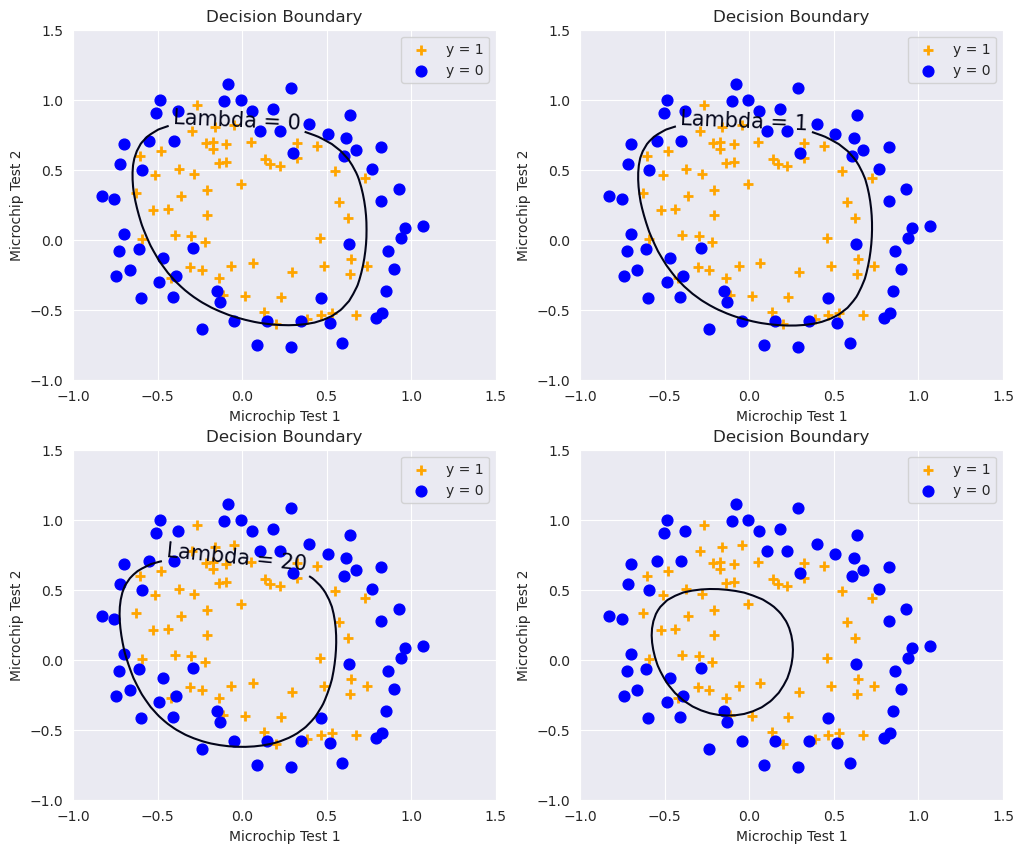

In [134]:
plt.figure(figsize=(12, 10))

plt.subplot(221)
plot_data(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plot_boundary(initial_theta, XX, y, 0.)

plt.subplot(222)
plot_data(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plot_boundary(initial_theta, XX, y, 1.)

plt.subplot(223)
plot_data(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plot_boundary(initial_theta, XX, y, 20.)

plt.subplot(224)
plot_data(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plot_boundary(initial_theta, XX, y, 100.)
